<a href="https://colab.research.google.com/github/klouderm/DS6290_RMS/blob/main/assignment2/assign_2_kylieLoudermilk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## License 

Copyright 2021-2023 Kylie Loudermilk (kylieloudermilk@gwu.edu)

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

*DISCLAIMER*: This notebook is not legal or compliance advice.

# Assignment 1 Template

#### Imports and inits

In [38]:
import itertools                                              # for cartesian product of parameters
import matplotlib.pyplot as plt                               # basic plotting
import numpy as np                                            # for basic array manipulation                            
import pandas as pd                                           # for dataframe manipulation
import seaborn as sns                                         # slightly better plotting  
import time                                                   # for timers

# set numpy random seed for better reproducibility
SEED = 12345 

# set number of threads
NTHREAD = 4   

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Start global timer

In [39]:
tic = time.time()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [40]:
import io
from google.colab import files
from google.colab import drive
uploaded = files.upload() # upload training and test data
import pandas as pd
train = pd.read_csv(io.StringIO(uploaded['hmda_train_preprocessed.csv'].decode('utf-8')))
test = pd.read_csv(io.StringIO(uploaded['hmda_test_preprocessed.csv'].decode('utf-8')))
!pip install piml
from piml import Experiment
exp = Experiment()
#exp.data_loader(data=train)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Saving hmda_test_preprocessed.csv to hmda_test_preprocessed (2).csv
Saving hmda_train_preprocessed.csv to hmda_train_preprocessed (2).csv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
drive.mount('/drive', force_remount=True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Mounted at /drive


#### Import data

In [42]:
#data = pd.read_csv('../data/hmda_train_preprocessed.csv')
#test = pd.read_csv('../data/hmda_test_preprocessed.csv')
data=train

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Assign basic modeling roles

In [43]:
y_name = 'high_priced'
x_names = ['term_360', 'conforming', 'debt_to_income_ratio_missing', 'loan_amount_std', 'loan_to_value_ratio_std', 'no_intro_rate_period_std',
           'intro_rate_period_std', 'property_value_std', 'income_std', 'debt_to_income_ratio_std']

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Basic data exploration

#### Histograms

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

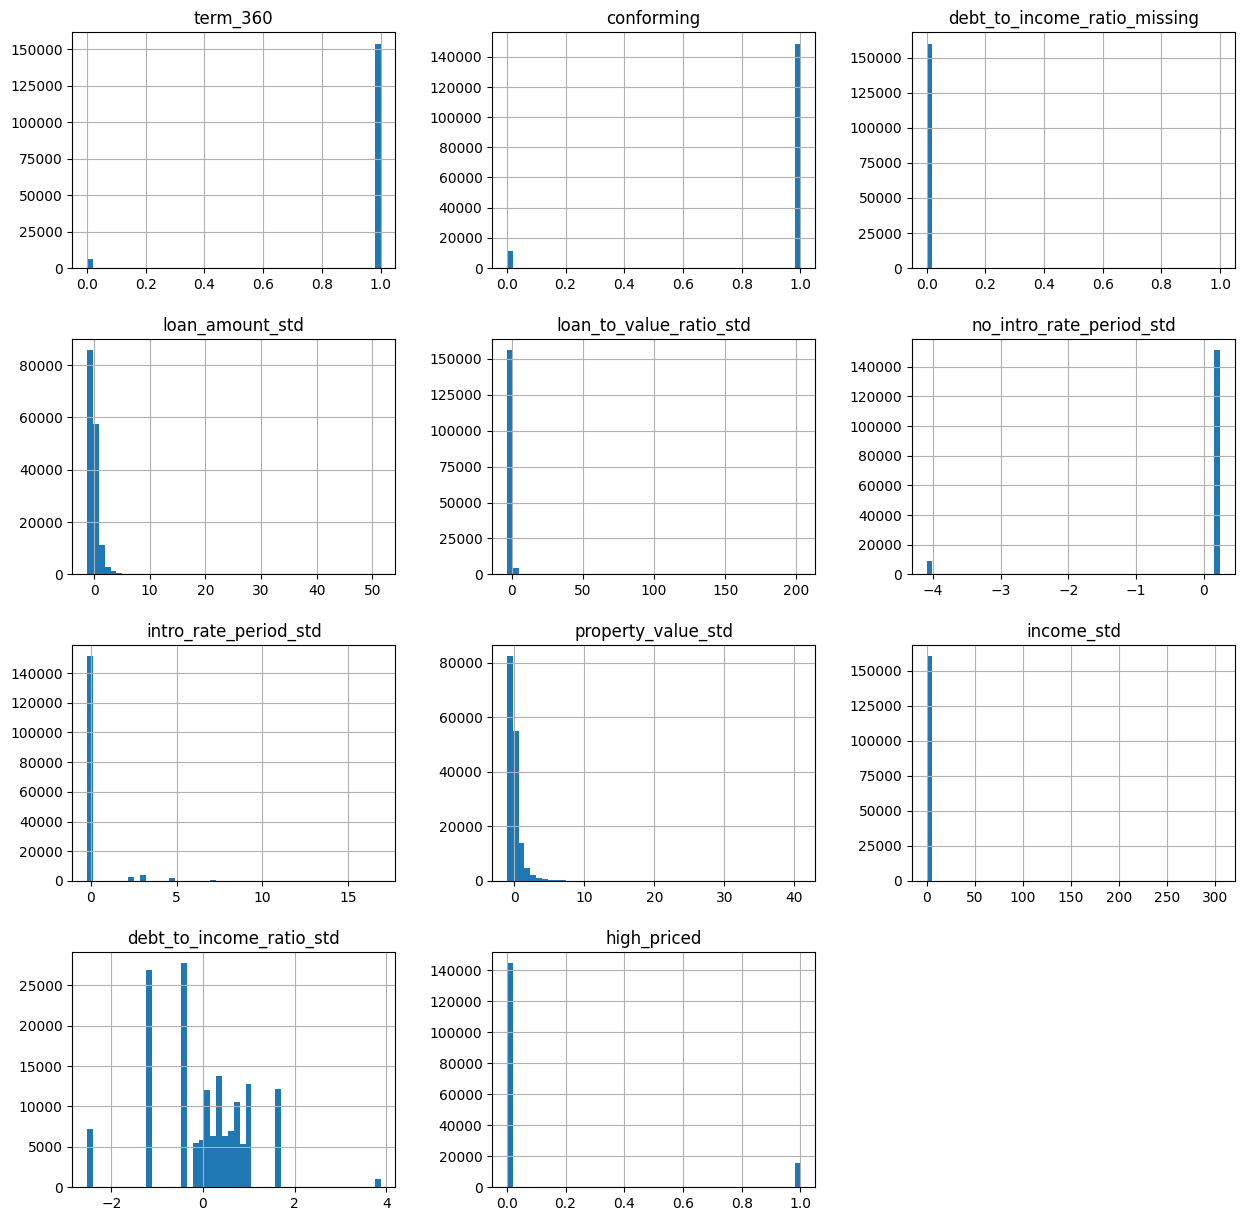

In [ ]:
_ = data[x_names + [y_name]].hist(bins=50, figsize=(15, 15))

#### Correlations

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

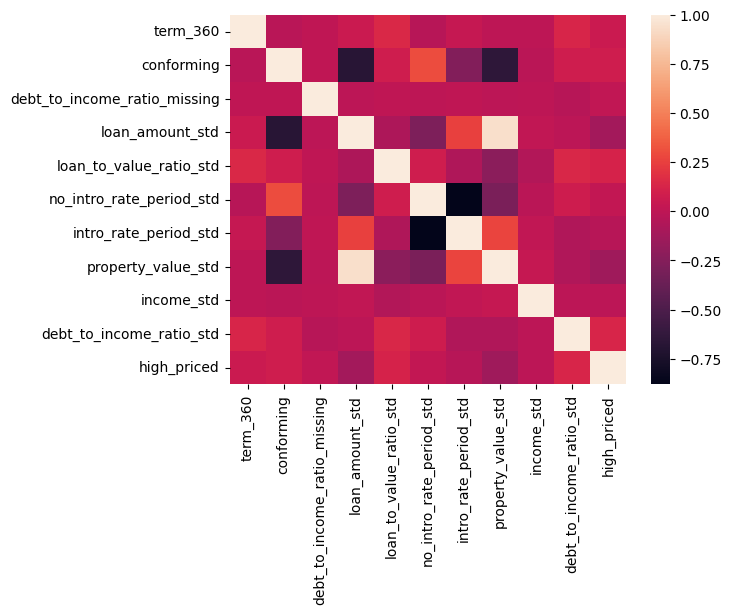

In [ ]:
corr = data[x_names + [y_name]].corr()
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

## Fit interpretable models

#### Split data into train and validation partitions 

In [44]:
np.random.seed(SEED) # preserve exact reproducibility for this cell

split_ratio = 0.7 # 70%/30% train/test split

# execute split
split = np.random.rand(len(data)) < split_ratio
train = data[split]
valid = data[~split]

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Validation data rows = %d, columns = %d' % (valid.shape[0], valid.shape[1]))

exp.data_loader(data=train[x_names+[y_name]])
exp.data_prepare()

# benchmark - Train data rows = 112253, columns = 23
# benchmark - Validation data rows = 48085, columns = 23

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Train data rows = 112253, columns = 23
Validation data rows = 48085, columns = 23


,term_360,conforming,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std,high_priced
0,1.0,1.0,0.0,-0.118642,0.268727,0.244394,-0.215304,-0.227585,-0.018133,-0.425131,0.0
1,1.0,1.0,0.0,-0.778227,0.228996,-4.091747,4.610857,-0.720941,-0.032338,0.123326,0.0
2,1.0,1.0,0.0,-0.074670,-1.150240,0.244394,-0.215304,0.358276,-0.018133,-0.425131,0.0
3,1.0,1.0,0.0,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.038228,0.763191,0.0
4,1.0,1.0,0.0,-0.338504,0.372784,0.244394,-0.215304,-0.412593,-0.024716,0.397554,0.0
...,...,...,...,...,...,...,...,...,...,...,...
112248,1.0,1.0,0.0,0.189165,-0.227057,0.244394,-0.215304,0.173267,-0.013628,-0.425131,0.0
112249,1.0,1.0,0.0,0.365054,0.663316,0.244394,-0.215304,0.019094,-0.015361,1.585876,0.0
112250,1.0,0.0,0.0,9.599253,-0.463082,-4.091747,2.197776,9.084518,0.270486,0.397554,0.0
112251,1.0,1.0,0.0,-0.998089,0.552520,0.244394,-0.215304,-0.905950,-0.039614,-0.425131,0.0


### GAMI-NET

Training GAMI-NET model

In [45]:
from piml.models import GAMINetClassifier
exp.model_train(model=GAMINetClassifier(), name='GAMI-NET')

exp.model_diagnose(model='GAMI-NET', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8966,0.7988,0.0628,0.3113,0.1046
Test,0.8909,0.7972,0.0604,0.3255,0.1019
Gap,-0.0057,-0.0016,-0.0024,0.0142,-0.0026


Generating predictions based on test data with GAMI-NET model

In [46]:
GNpreds = exp.experiment.registered_pipeline['GAMI-NET'].predict_proba(test[x_names].values)[:, 1]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Exporting predictions as csv

In [47]:
best_gn_submit = pd.DataFrame(GNpreds, columns=['phat'])
filename = '/drive/My Drive/Assignment1/kylieLoudermilk_best_gaminet_' + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.csv')
best_gn_submit.to_csv(filename,
                        index=False)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [48]:
id = pd.DataFrame(np.arange(0, 89802), columns=['ID']) # include ID for better traceability
train_x2 = pd.DataFrame(exp.get_raw_data()[0], columns=exp.get_raw_data()[6]) # X
train_y2 = pd.DataFrame(exp.get_raw_data()[1], columns=[exp.get_raw_data()[7]]) # y
gaminet_phat = pd.DataFrame(exp.experiment.registered_pipeline['GAMI-NET'].predict_proba(train_x2.values)[:, 1].reshape(89802, 1), columns=[str('p_' + exp.get_raw_data()[7])]) # phat
gaminet_train_phat = pd.concat([id, train_x2, train_y2, gaminet_phat], axis=1)
gaminet_train_phat

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ID,term_360,conforming,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std,high_priced,p_high_priced
0,0,1.0,1.0,0.0,0.013275,0.419928,0.244394,-0.215304,-0.165915,-0.019865,0.946010,1.0,0.202876
1,1,1.0,1.0,0.0,0.672861,0.378582,0.244394,-0.215304,0.327441,-0.018479,0.946010,0.0,0.106102
2,2,1.0,1.0,0.0,-0.030697,0.552520,0.244394,-0.215304,-0.227585,-0.009124,1.585876,0.0,0.234598
3,3,1.0,1.0,0.0,0.452999,-0.448865,0.244394,-0.215304,0.512450,-0.026795,0.763191,0.0,0.014599
4,4,1.0,1.0,0.0,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.039614,0.946010,0.0,0.364654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89797,89797,1.0,1.0,0.0,-0.558366,0.552520,0.244394,-0.215304,-0.597602,-0.033378,-0.425131,0.0,0.207236
89798,89798,1.0,1.0,0.0,0.189165,0.676952,0.244394,-0.215304,-0.104245,0.029335,-2.527547,0.0,0.034214
89799,89799,1.0,1.0,0.0,-0.118642,0.022152,0.244394,-0.215304,-0.165915,-0.029220,0.671782,0.0,0.057041
89800,89800,1.0,0.0,0.0,0.848750,0.107303,-4.091747,3.163008,0.574120,-0.010857,0.306144,0.0,0.004548


Identify Percentiles

In [49]:
def get_percentile_dict(yhat_name, valid, id_):

  """ Returns the percentiles of a column, yhat_name, as the indices based on
  another column id_.

  :param yhat_name: Name of column in valid in which to find percentiles.
  :param valid: Pandas validation frame.
  :param id_: explicit id column in validation frame.

  :return: Dictionary of percentile values and index column values.

  """

  # create a copy of frame and sort it by yhat
  sort_df = valid.copy(deep=True)
  sort_df.sort_values(yhat_name, inplace=True)
  sort_df.reset_index(inplace=True)

  # find top and bottom percentiles
  percentiles_dict = {0: sort_df.loc[0, id_], 99: sort_df.loc[sort_df.shape[0] - 1, id_]}

  # find 10th-90th percentiles
  inc = sort_df.shape[0] // 10
  for i in range(1, 10):
    percentiles_dict[i * 10] = sort_df.loc[i * inc, id_]

  return percentiles_dict

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [50]:
gaminet_percentile_dict = get_percentile_dict('p_high_priced', gaminet_train_phat, 'ID')
sorted(gaminet_percentile_dict.items()) # sorted list of row numbers for local investigation

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[(0, 35370),
 (10, 38050),
 (20, 76136),
 (30, 89103),
 (40, 857),
 (50, 60258),
 (60, 52978),
 (70, 84079),
 (80, 53570),
 (90, 40151),
 (99, 30811)]

In [22]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

### XGBoost Depth 2

Training XGBoost Depth 2 Model

In [15]:
from piml.models import XGB2Classifier
exp.model_train(model=XGB2Classifier(), name='XGB_2')


# start local timer
mxgb2_tic = time.time()


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [16]:
exp.model_diagnose(model='XGB_2', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9041,0.8262,0.0056,0.5926,0.0110
Test,0.8975,0.8212,0.0043,0.4545,0.0086
Gap,-0.0066,-0.0050,-0.0012,-0.1380,-0.0024


Generating predictions based on test data with XGBoost Depth 2 model

In [17]:
XGB2preds = exp.experiment.registered_pipeline['XGB_2'].predict_proba(test[x_names].values)[:, 1]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Exporting predictions as csv

In [29]:
best_xgb2_submit = pd.DataFrame(XGB2preds, columns=['phat'])
filename = '/drive/My Drive/Assignment1/kylieLoudermilk_best_xgb2_' + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.csv')
best_xgb2_submit.to_csv(filename,
                        index=False)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Identify Percentiles

In [18]:
id = pd.DataFrame(np.arange(0, 89802), columns=['ID']) # include ID for better traceability
train_x2 = pd.DataFrame(exp.get_raw_data()[0], columns=exp.get_raw_data()[6]) # X
train_y2 = pd.DataFrame(exp.get_raw_data()[1], columns=[exp.get_raw_data()[7]]) # y
XGB2_phat = pd.DataFrame(exp.experiment.registered_pipeline['XGB_2'].predict_proba(train_x2.values)[:, 1].reshape(89802, 1), columns=[str('p_' + exp.get_raw_data()[7])]) # phat
XGB2_train_phat = pd.concat([id, train_x2, train_y2, XGB2_phat], axis=1)
XGB2_train_phat

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ID,term_360,conforming,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std,high_priced,p_high_priced
0,0,1.0,1.0,0.0,0.013275,0.419928,0.244394,-0.215304,-0.165915,-0.019865,0.946010,1.0,0.250265
1,1,1.0,1.0,0.0,0.672861,0.378582,0.244394,-0.215304,0.327441,-0.018479,0.946010,0.0,0.116017
2,2,1.0,1.0,0.0,-0.030697,0.552520,0.244394,-0.215304,-0.227585,-0.009124,1.585876,0.0,0.218465
3,3,1.0,1.0,0.0,0.452999,-0.448865,0.244394,-0.215304,0.512450,-0.026795,0.763191,0.0,0.007532
4,4,1.0,1.0,0.0,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.039614,0.946010,0.0,0.205218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89797,89797,1.0,1.0,0.0,-0.558366,0.552520,0.244394,-0.215304,-0.597602,-0.033378,-0.425131,0.0,0.151758
89798,89798,1.0,1.0,0.0,0.189165,0.676952,0.244394,-0.215304,-0.104245,0.029335,-2.527547,0.0,0.006383
89799,89799,1.0,1.0,0.0,-0.118642,0.022152,0.244394,-0.215304,-0.165915,-0.029220,0.671782,0.0,0.044529
89800,89800,1.0,0.0,0.0,0.848750,0.107303,-4.091747,3.163008,0.574120,-0.010857,0.306144,0.0,0.017695


In [19]:
XGB2_percentile_dict = get_percentile_dict('p_high_priced', XGB2_train_phat, 'ID')
sorted(XGB2_percentile_dict.items()) # sorted list of row numbers for local investigation

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[(0, 89307),
 (10, 60302),
 (20, 70381),
 (30, 56472),
 (40, 83203),
 (50, 41179),
 (60, 77378),
 (70, 1485),
 (80, 49299),
 (90, 84624),
 (99, 80430)]

Post-Hoc Explnation Analysis

In [21]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

### ReluDNN

Training ReluDNN Model

In [31]:
from piml.models import ReluDNNClassifier
exp.model_train(model=ReluDNNClassifier(), name='ReluDNN')


# start local timer
_tic = time.time()


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [32]:
exp.model_diagnose(model='ReluDNN', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9039,0.8001,0.0001,0.5000,0.0002
Test,0.8976,0.7996,0.0000,0.0000,0.0000
Gap,-0.0064,-0.0005,-0.0001,-0.5000,-0.0002


Generating predictions based on test data with ReluDNN model

In [33]:
ReluDNNpreds = exp.experiment.registered_pipeline['ReluDNN'].predict_proba(test[x_names].values)[:, 1]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Exporting predictions as csv

In [ ]:
best_reludnn_submit = pd.DataFrame(ReluDNNpreds, columns=['phat'])
filename = '/drive/My Drive/Assignment1/kylieLoudermilk_best_reludnn_' + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.csv')
best_reludnn_submit.to_csv(filename,
                        index=False)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Identify Percentiles

In [34]:
id = pd.DataFrame(np.arange(0, 89802), columns=['ID']) # include ID for better traceability
train_x2 = pd.DataFrame(exp.get_raw_data()[0], columns=exp.get_raw_data()[6]) # X
train_y2 = pd.DataFrame(exp.get_raw_data()[1], columns=[exp.get_raw_data()[7]]) # y
reludnn_phat = pd.DataFrame(exp.experiment.registered_pipeline['ReluDNN'].predict_proba(train_x2.values)[:, 1].reshape(89802, 1), columns=[str('p_' + exp.get_raw_data()[7])]) # phat
reludnn_train_phat = pd.concat([id, train_x2, train_y2, reludnn_phat], axis=1)
reludnn_train_phat

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ID,term_360,conforming,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std,high_priced,p_high_priced
0,0,1.0,1.0,0.0,0.013275,0.419928,0.244394,-0.215304,-0.165915,-0.019865,0.946010,1.0,0.156573
1,1,1.0,1.0,0.0,0.672861,0.378582,0.244394,-0.215304,0.327441,-0.018479,0.946010,0.0,0.111852
2,2,1.0,1.0,0.0,-0.030697,0.552520,0.244394,-0.215304,-0.227585,-0.009124,1.585876,0.0,0.206529
3,3,1.0,1.0,0.0,0.452999,-0.448865,0.244394,-0.215304,0.512450,-0.026795,0.763191,0.0,0.007814
4,4,1.0,1.0,0.0,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.039614,0.946010,0.0,0.287006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89797,89797,1.0,1.0,0.0,-0.558366,0.552520,0.244394,-0.215304,-0.597602,-0.033378,-0.425131,0.0,0.172389
89798,89798,1.0,1.0,0.0,0.189165,0.676952,0.244394,-0.215304,-0.104245,0.029335,-2.527547,0.0,0.057002
89799,89799,1.0,1.0,0.0,-0.118642,0.022152,0.244394,-0.215304,-0.165915,-0.029220,0.671782,0.0,0.054488
89800,89800,1.0,0.0,0.0,0.848750,0.107303,-4.091747,3.163008,0.574120,-0.010857,0.306144,0.0,0.018914


In [35]:
reludnn_percentile_dict = get_percentile_dict('p_high_priced', reludnn_train_phat, 'ID')
sorted(reludnn_percentile_dict.items()) # sorted list of row numbers for local investigation

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[(0, 36718),
 (10, 9975),
 (20, 21977),
 (30, 67114),
 (40, 6795),
 (50, 88506),
 (60, 83300),
 (70, 25592),
 (80, 85995),
 (90, 47325),
 (99, 17051)]

Post-Hoc Explnation Analysis

In [36]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [26]:
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>